#  Aircraft Collector Application:

### Create your personal Aircraft Collection of planes you love. 

- Aircraft App: https://aircraftcollector.herokuapp.com/
<br>
<p>This application is meant as an hobbyist tool to add Aircrafts, services, and create a mangement system for viewing them. 
    
#### Technologies used:
> Python
>
> Django
>
> PostgreSQL
>
> AWS S3
>
> DTL Templates

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load data
url = "https://raw.githubusercontent.com/GabrielCMM74/C964-CS/main/datasets/cars-data-sales%20copy%203.csv"
df = pd.read_csv(url, encoding='utf-16')

# Remove rows with missing 'Price'
df.dropna(subset=['Price'], inplace=True)

# Exclude outliers
upper_limit = df['Price'].quantile(0.99)
df = df[df['Price'] < upper_limit]

# Sampling a subset of the data for quicker training - for demonstration, using 10% of the data
df_sample = df.sample(frac=0.1, random_state=42)

X = df_sample[['Year', 'Brand']]
y = df_sample['Price'].values

column_transformer = ColumnTransformer([
    ("encoder", OneHotEncoder(sparse=True, handle_unknown='ignore'), ['Brand'])
], remainder='passthrough')


svm_pipeline = make_pipeline(
    column_transformer,
    SVR(kernel='linear', C=1.0, epsilon=0.2, max_iter=10000)
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_pipeline.fit(X_train, y_train)

predictions = svm_pipeline.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions) * 100

print("Accuracy Metrics for SVM")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}%")

Accuracy Metrics for SVM
Mean Squared Error (MSE): 623243917.29
R-squared: 16.72%


Numerical Data Statistics:


,count,mean,std,min,25%,50%,75%,max
Year,63261.0,2021.210778,8.253534,215.0,2020.0,2023.0,2023.0,2024.0
Mileage,25691.0,53151.387762,44860.780329,0.0,19933.5,41025.0,75010.5,405187.0
Price,63261.0,52497.605729,28801.545690,2000.0,32919.0,47595.0,65649.0,201200.0



Categorical Data Statistics:


,count,unique,top,freq
Brand,63261,28,Ford,13858
Model,63261,337,F-150,3581
Status,63261,3,New,37569
Dealer,63071,5916,Ourisman Lexus,154



Distribution of 'Price':


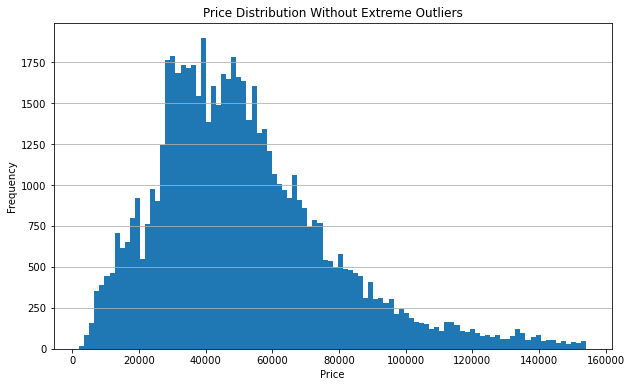

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Handle missing values for 'Price' by dropping rows with missing 'Price' values
df.dropna(subset=['Price'], inplace=True)

def enhanced_describe(df):
    # Numerical Data Description
    numerical_stats = df.describe().transpose()
    
    # Categorical Data Description
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_stats = pd.DataFrame(index=categorical_columns, columns=['count', 'unique', 'top', 'freq'])
    for column in categorical_columns:
        categorical_stats.loc[column, 'count'] = df[column].count()
        categorical_stats.loc[column, 'unique'] = df[column].nunique()
        categorical_stats.loc[column, 'top'] = df[column].mode()[0]
        categorical_stats.loc[column, 'freq'] = df[column].value_counts().iloc[0]
    
    # Combine and Display
    print("Numerical Data Statistics:")
    display(numerical_stats)
    
    print("\nCategorical Data Statistics:")
    display(categorical_stats)
    
    # Visualizing the distribution of 'Price' (or another key numerical column)
    print("\nDistribution of 'Price':")

    # Then, create a histogram with adjusted bins and a log scale.
    upper_limit = df['Price'].quantile(0.99)

    # Filter the DataFrame to exclude values above the upper limit
    filtered_prices = df[df['Price'] < upper_limit]['Price']

    # Plot the histogram of prices without extreme outliers
    plt.figure(figsize=(10, 6))
    filtered_prices.plot(kind='hist', bins=100, title='Price Distribution Without Extreme Outliers')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Assuming df is your DataFrame
enhanced_describe(df)


In [3]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Load your dataset
# (Make sure to run Block 1 to have 'df' and 'svm_pipeline' available)

# Function to filter data based on user selection
def filter_data(brand, year):
    if brand == 'All Brands':
        return df[df['Year'] == year]
    else:
        return df[(df['Brand'] == brand) & (df['Year'] == year)]

# Function for Predicted Price by Brand Bar Chart
def plot_predicted_prices(selected_year):
    plt.figure(figsize=(12, 6))
    
    # Preparing the data with the selected year for all brands
    unique_brands = df['Brand'].unique()  # Use the original dataframe to ensure all brands are included
    prediction_data = pd.DataFrame({'Year': [selected_year] * len(unique_brands), 'Brand': unique_brands})
    
    try:
        # Since the 'svm_pipeline' expects the original dataframe format, we use 'Year' and 'Brand' only
        predicted_prices = svm_pipeline.predict(prediction_data)
        sns.barplot(x=unique_brands, y=predicted_prices)
        plt.title(f'Predicted Average Prices for {selected_year}')
        plt.xlabel('Brand')
        plt.ylabel('Predicted Price')
        plt.xticks(rotation=45)
        plt.grid(True)
    except Exception as e:
        plt.text(0.5, 0.5, f'An error occurred: {str(e)}', ha='center', va='center')
        plt.xticks([])
        plt.yticks([])
    
    plt.show()

    
# Function for Brand-wise Distribution (Violin Plot)
def plot_violin(filtered_df):
    plt.figure(figsize=(12, 6))
    if filtered_df.empty:
        plt.text(0.5, 0.5, 'No data available for this selection', ha='center')
    else:
        sns.violinplot(x='Brand', y='Price', data=filtered_df)
    plt.title('Brand-wise Price Distribution')
    plt.xlabel('Brand')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Placeholder for Cluster Analysis Visualization
def plot_cluster(filtered_df):
    plt.figure(figsize=(12, 6))
    # Implement clustering logic here
    # For demonstration, a placeholder text is used
    plt.text(0.5, 0.5, 'Cluster visualization not implemented', ha='center')
    plt.title('Cluster Analysis')
    plt.show()

# Function to update visualizations
# Function to update visualizations
def update_visualizations(selected_brand, selected_year):
    filtered_df = filter_data(selected_brand, selected_year)
    plot_predicted_prices(selected_year)  # Note that we only pass the selected year now
    plot_violin(filtered_df)
    plot_cluster(filtered_df)


# UI Components
brand_dropdown = widgets.Dropdown(options=['All Brands'] + list(df['Brand'].unique()), value='All Brands', description='Brand:')
year_dropdown = widgets.Dropdown(options=list(range(2024, 2051)), value=2024, description='Year:')
predict_button = widgets.Button(description="Predict")

# Output for the plots
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        clear_output(wait=True)
        selected_brand = brand_dropdown.value
        selected_year = year_dropdown.value
        update_visualizations(selected_brand, selected_year)

predict_button.on_click(on_predict_button_clicked)

# Display UI components
display(brand_dropdown, year_dropdown, predict_button, output)

# Run initial visualization
on_predict_button_clicked(None)


Dropdown(description='Brand:', options=('All Brands', 'Mazda', 'BMW', 'Ford', 'Honda', 'Toyota', 'Lexus', 'RAM…

Dropdown(description='Year:', options=(2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035,…

Button(description='Predict', style=ButtonStyle())

Output()

In [4]:
import ipywidgets as widgets
from IPython.display import display

# Dropdown for Brand selection
brand_dropdown = widgets.Dropdown(
    options=['All Brands'] + list(df['Brand'].unique()),
    value='All Brands',
    description='Brand:',
)

# Dropdown for Year selection
year_dropdown = widgets.Dropdown(
    options=list(range(2024, 2051)),
    value=2024,
    description='Year:',
)

predict_button = widgets.Button(description="Predict")

# Function to handle button click
def on_predict_button_clicked(b):
    selected_brand = brand_dropdown.value
    selected_year = year_dropdown.value
    # Placeholder for prediction logic and visualization rendering
    print(f"Selected Brand: {selected_brand}, Selected Year: {selected_year}")
    # Here you would include your logic for making predictions based on the selection
    # and then update the visualizations accordingly.

predict_button.on_click(on_predict_button_clicked)

# Display UI components
display(brand_dropdown, year_dropdown, predict_button)

Dropdown(description='Brand:', options=('All Brands', 'Mazda', 'BMW', 'Ford', 'Honda', 'Toyota', 'Lexus', 'RAM…

Dropdown(description='Year:', options=(2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035,…

Button(description='Predict', style=ButtonStyle())

In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Load your dataset
# (Make sure to run Block 1 to have 'df' and 'svm_pipeline' available)

# Function to filter data based on user selection
def filter_data(brand, year):
    if brand == 'All Brands':
        return df[df['Year'] == year]
    else:
        return df[(df['Brand'] == brand) & (df['Year'] == year)]

# Function for Scatter Plot with Regression Line
def plot_regression(filtered_df):
    if filtered_df.empty:
        plt.text(0.5, 0.5, 'No data available for this selection', ha='center')
    else:
        sns.regplot(x='Year', y='Price', data=filtered_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title('Price vs. Year Regression')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

# Function for Brand-wise Distribution (Violin Plot)
def plot_violin(filtered_df):
    if filtered_df.empty:
        plt.text(0.5, 0.5, 'No data available for this selection', ha='center')
    else:
        sns.violinplot(x='Brand', y='Price', data=filtered_df)
    plt.title('Brand-wise Price Distribution')
    plt.xlabel('Brand')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Placeholder for Cluster Analysis Visualization
def plot_cluster(filtered_df):
    # Implement clustering logic here
    # For demonstration, a placeholder text is used
    plt.text(0.5, 0.5, 'Cluster visualization not implemented', ha='center')
    plt.title('Cluster Analysis')
    plt.show()

# Function to update visualizations
def update_visualizations(selected_brand, selected_year):
    filtered_df = filter_data(selected_brand, selected_year)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plot_regression(filtered_df)
    plt.subplot(1, 3, 2)
    plot_violin(filtered_df)
    plt.subplot(1, 3, 3)
    plot_cluster(filtered_df)

# UI Components
brand_dropdown = widgets.Dropdown(options=['All Brands'] + list(df['Brand'].unique()), value='All Brands', description='Brand:')
year_dropdown = widgets.Dropdown(options=list(range(2024, 2051)), value=2024, description='Year:')
predict_button = widgets.Button(description="Predict")

# Output for the plots
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        clear_output(wait=True)
        selected_brand = brand_dropdown.value
        selected_year = year_dropdown.value
        update_visualizations(selected_brand, selected_year)

predict_button.on_click(on_predict_button_clicked)

# Display UI components
display(brand_dropdown, year_dropdown, predict_button, output)

# Run initial visualization
on_predict_button_clicked(None)


Dropdown(description='Brand:', options=('All Brands', 'Mazda', 'BMW', 'Ford', 'Honda', 'Toyota', 'Lexus', 'RAM…

Dropdown(description='Year:', options=(2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035,…

Button(description='Predict', style=ButtonStyle())

Output()